In [3]:
!unzip -o dataset.zip -d data

Archive:  dataset.zip
  inflating: data/archive/Patients_noID_short.csv  
  inflating: data/archive/Признаки_noID.csv  
  inflating: data/archive/Признаки_noID.xlsx  
  inflating: data/archive/Признаки_noID_D.csv  
  inflating: data/archive/Признаки_noID_D.xlsx  
  inflating: data/archive/Признаки_noID_R.csv  
  inflating: data/archive/Признаки_noID_R.xlsx  


In [1]:
import pandas as pd

df = pd.read_csv('data/archive/Признаки_noID.csv', sep=None, engine='python')
df_D = pd.read_csv('data/archive/Признаки_noID_D.csv', sep=None, engine='python')
df_R = pd.read_csv('data/archive/Признаки_noID_R.csv', sep=None, engine='python')

In [2]:
print(f'df (shape={df.shape}) — столбцы:')
print(list(map(str, df.columns)))
print('-' * 60)

df (shape=(190, 99)) — столбцы:
['file', 'start', 'end', 'F0semitoneFrom27.5Hz_sma3nz_amean', 'F0semitoneFrom27.5Hz_sma3nz_stddevNorm', 'F0semitoneFrom27.5Hz_sma3nz_percentile20.0', 'F0semitoneFrom27.5Hz_sma3nz_percentile50.0', 'F0semitoneFrom27.5Hz_sma3nz_percentile80.0', 'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2', 'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope', 'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope', 'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope', 'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope', 'loudness_sma3_amean', 'loudness_sma3_stddevNorm', 'loudness_sma3_percentile20.0', 'loudness_sma3_percentile50.0', 'loudness_sma3_percentile80.0', 'loudness_sma3_pctlrange0-2', 'loudness_sma3_meanRisingSlope', 'loudness_sma3_stddevRisingSlope', 'loudness_sma3_meanFallingSlope', 'loudness_sma3_stddevFallingSlope', 'spectralFlux_sma3_amean', 'spectralFlux_sma3_stddevNorm', 'mfcc1_sma3_amean', 'mfcc1_sma3_stddevNorm', 'mfcc2_sma3_amean', 'mfcc2_sma3_stddevNorm', 'mfcc3_sma3_amean', 'mfc

In [3]:
from IPython.display import display

wanted = ['Пол', 'Возраст', 'MMSE', 'MoCA', 'CDR', 'Группа', 'ФормаРечи']

def show_subset(d, name, n=5):
    cols_present = [c for c in wanted if c in d.columns]
    missing = [c for c in wanted if c not in d.columns]
    print(f'{name}: показываю {len(cols_present)} столбцов. Отсутствуют: {missing}' if missing else f'{name}: все столбцы найдены')
    display(d.loc[:, cols_present].head(n))

for name, d in [('df', df), ('df_R', df_R), ('df_D', df_D)]:
    show_subset(d, name, n=5)

df: все столбцы найдены


,Пол,Возраст,MMSE,MoCA,CDR,Группа,ФормаРечи
0,женский,64.0,30.0,23,0.5,ЛКР,D
1,женский,74.0,22.0,17,1.0,Деменция легкой степени,D
2,женский,66.0,28.0,24,0.5,ЛКР,R
3,женский,88.0,29.0,22,0.5,ЛКР,D
4,женский,66.0,28.0,25,0.5,ЛКР,D


df_R: все столбцы найдены


,Пол,Возраст,MMSE,MoCA,CDR,Группа,ФормаРечи
0,женский,66.0,28.0,24,0.5,ЛКР,R
1,женский,64.0,30.0,23,0.5,ЛКР,R
2,женский,88.0,29.0,22,0.5,ЛКР,R
3,женский,82.0,24.0,22,1.0,Деменция легкой степени,R
4,женский,83.0,19.0,17,1.0,Деменция легкой степени,R


df_D: все столбцы найдены


,Пол,Возраст,MMSE,MoCA,CDR,Группа,ФормаРечи
0,женский,64.0,30.0,23,0.5,ЛКР,D
1,женский,74.0,22.0,17,1.0,Деменция легкой степени,D
2,женский,88.0,29.0,22,0.5,ЛКР,D
3,женский,66.0,28.0,25,0.5,ЛКР,D
4,женский,86.0,27.0,17,0.5,ЛКР,D


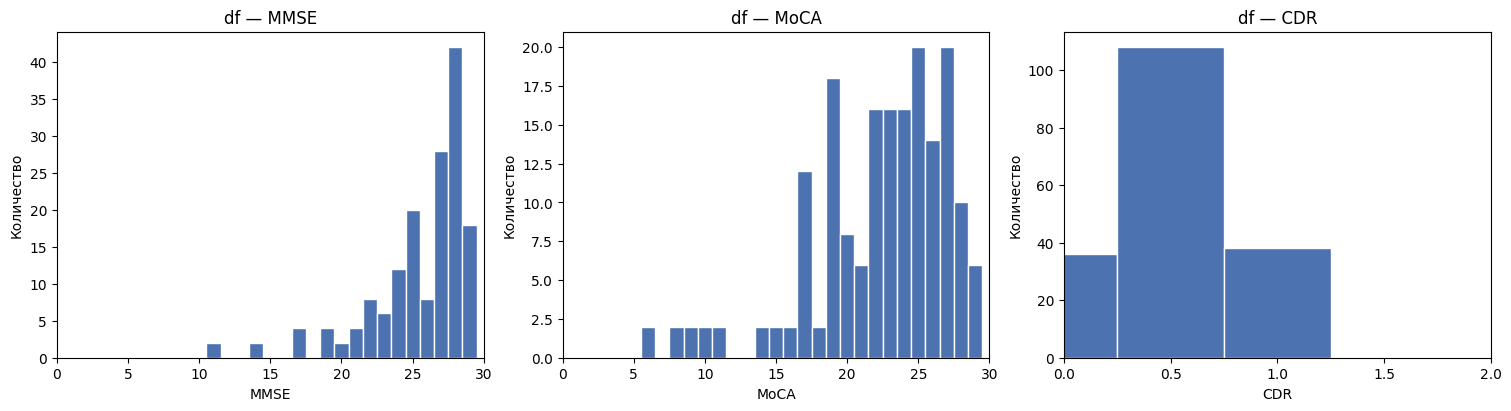

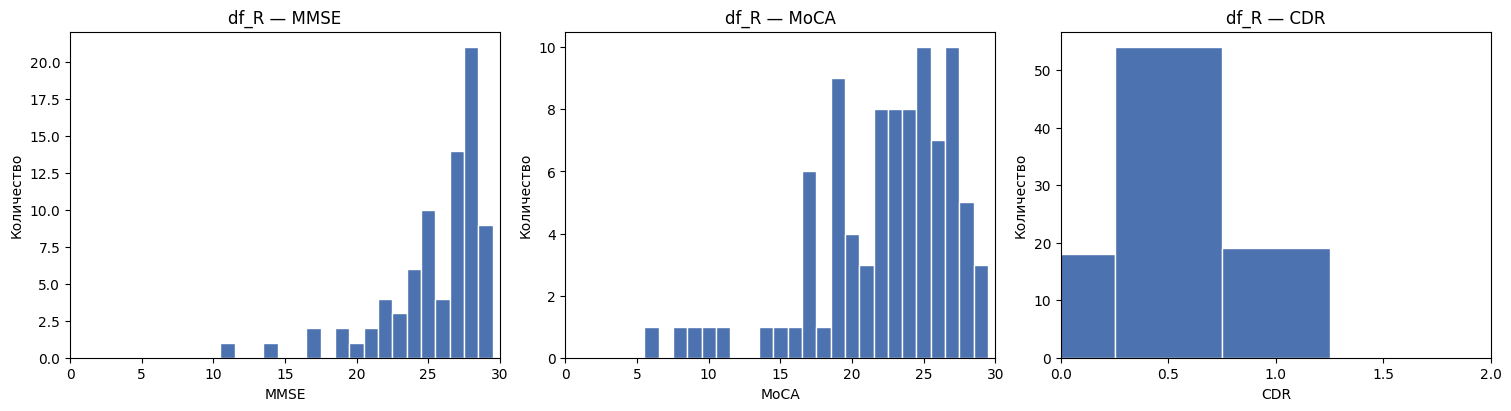

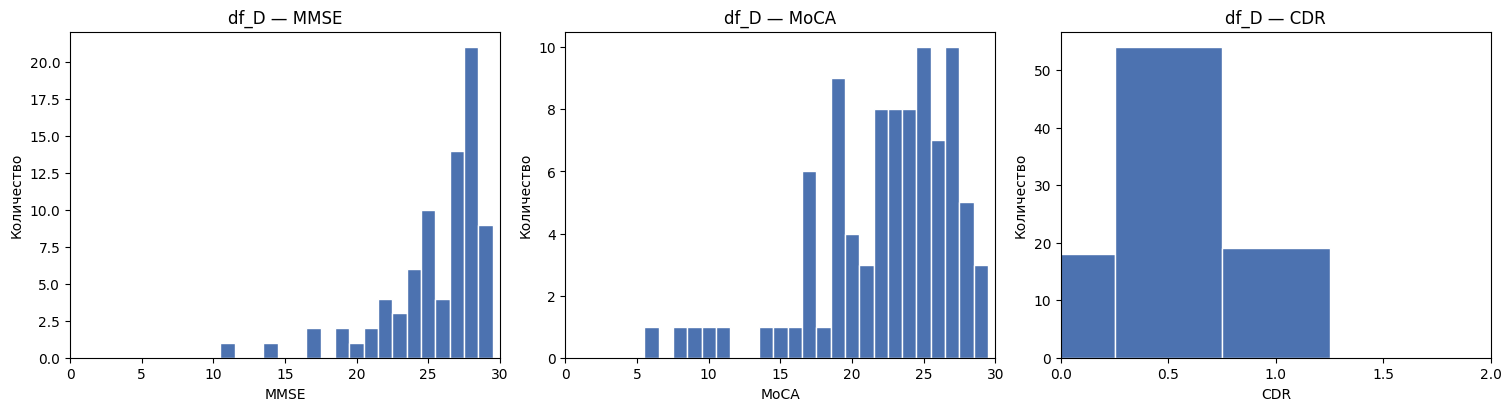

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_hists(d, name):
    specs = [
    ('MMSE', np.arange(-0.5, 30.5, 1), (0, 30), 5),
    ('MoCA', np.arange(-0.5, 30.5, 1), (0, 30), 5),
    ('CDR', np.arange(-0.25, 2.25, 0.5), (0, 2), 0.5),
    ]
    present = [s for s in specs if s[0] in d.columns]
    if not present:
        print(f'{name}: нет столбцов MMSE/MoCA/CDR')
        return


    fig, axes = plt.subplots(1, len(present), figsize=(5*len(present), 4), constrained_layout=True)
    if len(present) == 1:
        axes = [axes]

    for ax, (col, bins, xlim, tick_step) in zip(axes, present):
        s = pd.to_numeric(d[col], errors='coerce').dropna()
        ax.hist(s, bins=bins, color='#4C72B0', edgecolor='white')
        ax.set_title(f'{name} — {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Количество')
        ax.set_xlim(xlim)
        ax.set_xticks(np.arange(xlim[0], xlim[1] + tick_step, tick_step))

    plt.show()
    
for name, d in [('df', df), ('df_R', df_R), ('df_D', df_D)]:
    plot_hists(d, name)

In [5]:
rules = {
'MMSE': ('<', 23.5), # пример: 1 если MMSE < 23.5
'MoCA': ('<', 25.5), # пример: 1 если MoCA < 25.5
'CDR': ('>', 0.75), # пример: 1 если CDR > 0.75
}

ops = {
'<': lambda s, t: s < t,
'<=': lambda s, t: s <= t,
'>': lambda s, t: s > t,
'>=': lambda s, t: s >= t,
'==': lambda s, t: s == t,
'!=': lambda s, t: s != t,
}

In [6]:
def add_targets(d: pd.DataFrame, rules: dict, prefix='t_', decimal_comma=True):
    created = []
    for col, (op, thr) in rules.items():
        if col not in d.columns:
            print(f'Внимание: в датафрейме нет столбца {col}')
            continue
        if op not in ops:
            raise ValueError(f'Неизвестный оператор {op} для {col}')
        s = d[col].astype(str)
        if decimal_comma:
            s = s.str.replace(',', '.', regex=False)  # на случай десятичной запятой
        vals = pd.to_numeric(s, errors='coerce')  # -> число, некорректные -> NaN

        res = pd.Series(pd.NA, index=d.index, dtype='Int8')  # 0/1/NA
        mask = vals.notna()
        res[mask] = ops[op](vals[mask], thr).astype('int8')
        tcol = f'{prefix}{col}'
        d[tcol] = res
        created.append(tcol)
    return created

In [7]:
for name, d in [('df', df), ('df_R', df_R), ('df_D', df_D)]:
    add_targets(d, rules)
    print(f'{name}: распределение таргетов')
    for col in rules.keys():
        tcol = f't_{col}'
        if tcol in d.columns:
            print(tcol, d[tcol].value_counts(dropna=False).to_dict())
            print('-' * 50)

df: распределение таргетов
t_MMSE {0: 158, 1: 32, <NA>: 0}
--------------------------------------------------
t_MoCA {1: 130, 0: 50, <NA>: 10}
--------------------------------------------------
t_CDR {0: 144, 1: 46, <NA>: 0}
--------------------------------------------------
df_R: распределение таргетов
t_MMSE {0: 79, 1: 16, <NA>: 0}
--------------------------------------------------
t_MoCA {1: 65, 0: 25, <NA>: 5}
--------------------------------------------------
t_CDR {0: 72, 1: 23, <NA>: 0}
--------------------------------------------------
df_D: распределение таргетов
t_MMSE {0: 79, 1: 16, <NA>: 0}
--------------------------------------------------
t_MoCA {1: 65, 0: 25, <NA>: 5}
--------------------------------------------------
t_CDR {0: 72, 1: 23, <NA>: 0}
--------------------------------------------------


In [8]:
def plot_target_dists(d, name, targets=('t_MMSE', 't_MoCA', 't_CDR')):
    present = [t for t in targets if t in d.columns]
    if not present:
        print(f'{name}: нет целевых столбцов среди {targets}')
        return
    fig, axes = plt.subplots(1, len(present), figsize=(4*len(present), 4), constrained_layout=True)
    if len(present) == 1:
        axes = [axes]
    for ax, tcol in zip(axes, present):
        s = d[tcol]
        n_total = len(s)
        n0 = int((s == 0).sum())
        n1 = int((s == 1).sum())
        nna = int(s.isna().sum())
        counts = [n0, n1, nna]
        labels = ['0', '1', 'NA']
        xpos = np.arange(len(labels))
        colors = ['#4C72B0', '#55A868', '#C44E52']
        ax.bar(xpos, counts, color=colors, edgecolor='white')
        ax.set_xticks(xpos, labels)
        ax.set_ylabel('Количество')
        ax.set_title(f'{name} — {tcol}')
        ymax = max(counts) if counts else 1
        ax.set_ylim(0, ymax*1.15 if ymax > 0 else 1)

        for x, c in zip(xpos, counts):
            if n_total > 0:
                pct = c / n_total * 100
                ax.text(x, c, f'{c}\n{pct:.1f}%', ha='center', va='bottom', fontsize=9)
    plt.show()
    return

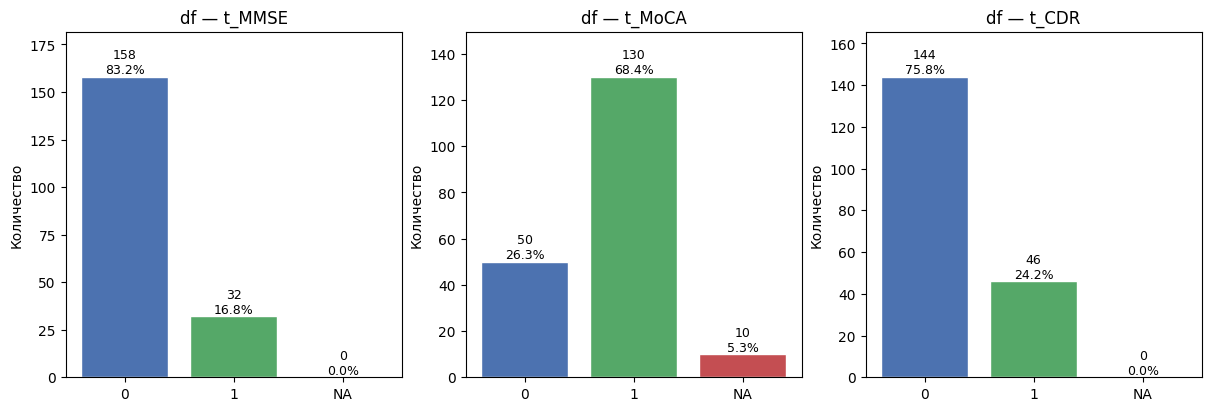

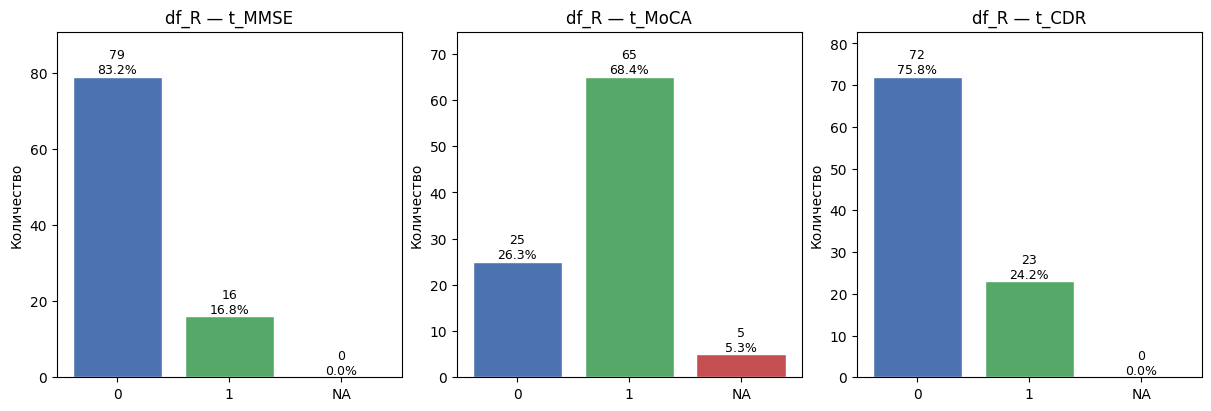

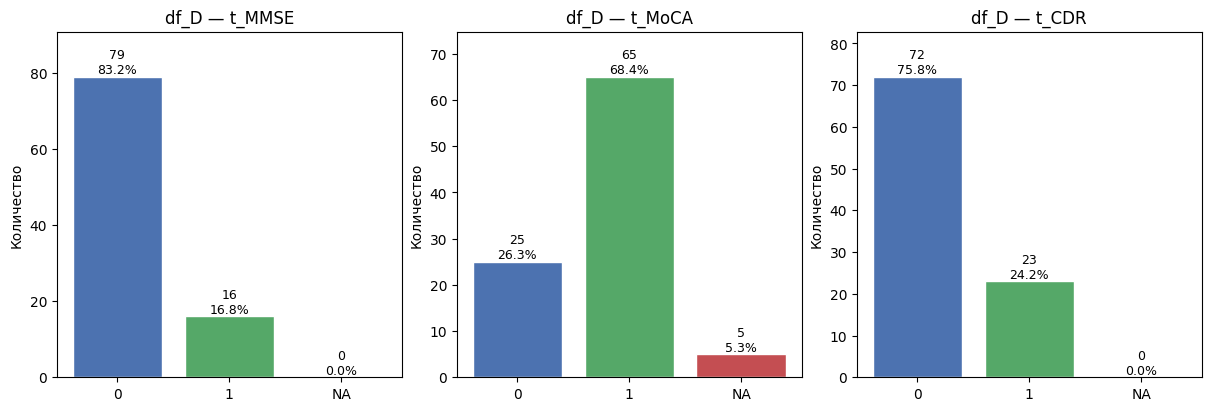

In [9]:
for name, d in [('df', df), ('df_R', df_R), ('df_D', df_D)]:
    plot_target_dists(d, name)

In [10]:
print(f'df (shape={df.shape}) — столбцы:')
print(list(map(str, df.columns)))
print('-' * 60)


df (shape=(190, 102)) — столбцы:
['file', 'start', 'end', 'F0semitoneFrom27.5Hz_sma3nz_amean', 'F0semitoneFrom27.5Hz_sma3nz_stddevNorm', 'F0semitoneFrom27.5Hz_sma3nz_percentile20.0', 'F0semitoneFrom27.5Hz_sma3nz_percentile50.0', 'F0semitoneFrom27.5Hz_sma3nz_percentile80.0', 'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2', 'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope', 'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope', 'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope', 'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope', 'loudness_sma3_amean', 'loudness_sma3_stddevNorm', 'loudness_sma3_percentile20.0', 'loudness_sma3_percentile50.0', 'loudness_sma3_percentile80.0', 'loudness_sma3_pctlrange0-2', 'loudness_sma3_meanRisingSlope', 'loudness_sma3_stddevRisingSlope', 'loudness_sma3_meanFallingSlope', 'loudness_sma3_stddevFallingSlope', 'spectralFlux_sma3_amean', 'spectralFlux_sma3_stddevNorm', 'mfcc1_sma3_amean', 'mfcc1_sma3_stddevNorm', 'mfcc2_sma3_amean', 'mfcc2_sma3_stddevNorm', 'mfcc3_sma3_amean', 'mf

In [11]:
moca_vals = d.loc[d['t_MoCA'].isna(), 'MoCA']
print(moca_vals.tolist())


['-', '-', '-', '-', '-']


In [12]:
drop_cols = [
'file', 'start', 'end',
'Пол', 'Возраст', 'MMSE', 'MoCA', 'CDR',
'Группа', 'Номер пациента', 'ФормаРечи',
't_MMSE', 't_MoCA', 't_CDR'
]

def make_dataset(d: pd.DataFrame, target: str, drop_cols=drop_cols):
    if target not in d.columns:
        raise KeyError(f'В датафрейме нет столбца {target}')

    # Признаки: все, кроме служебных и самого таргета
    drop_set = set(drop_cols) - {target}
    X = d.drop(columns=list(drop_set), errors='ignore').drop(columns=[target], errors='ignore')

    # Приведем признаки к числовым и удалим полностью пустые колонки
    X = X.apply(lambda s: pd.to_numeric(s.astype(str).str.replace(',', '.', regex=False), errors='coerce'))
    all_nan_cols = X.columns[X.isna().all()]
    if len(all_nan_cols):
        X = X.drop(columns=list(all_nan_cols))

    # Таргет
    y_raw = d[target]
    if target.startswith('t_'):
        # Классификация: оставим только 0/1, остальное — NaN
        y = pd.to_numeric(y_raw, errors='coerce')
        mask = y.isin([0, 1])
        y = y.astype('Int8')
    else:
        # Регрессия
        y = pd.to_numeric(y_raw.astype(str).str.replace(',', '.', regex=False), errors='coerce')
        mask = y.notna()

    # Отберем строки без NaN в таргете
    X = X.loc[mask]
    y = y.loc[mask]

    # Удалим строки, где все признаки NaN
    good_rows = ~X.isna().all(axis=1)
    X = X.loc[good_rows]
    y = y.loc[good_rows]

    return X, y

=== АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ ===

--- Анализ для t_MoCA ---

Спонтанное описание (D):


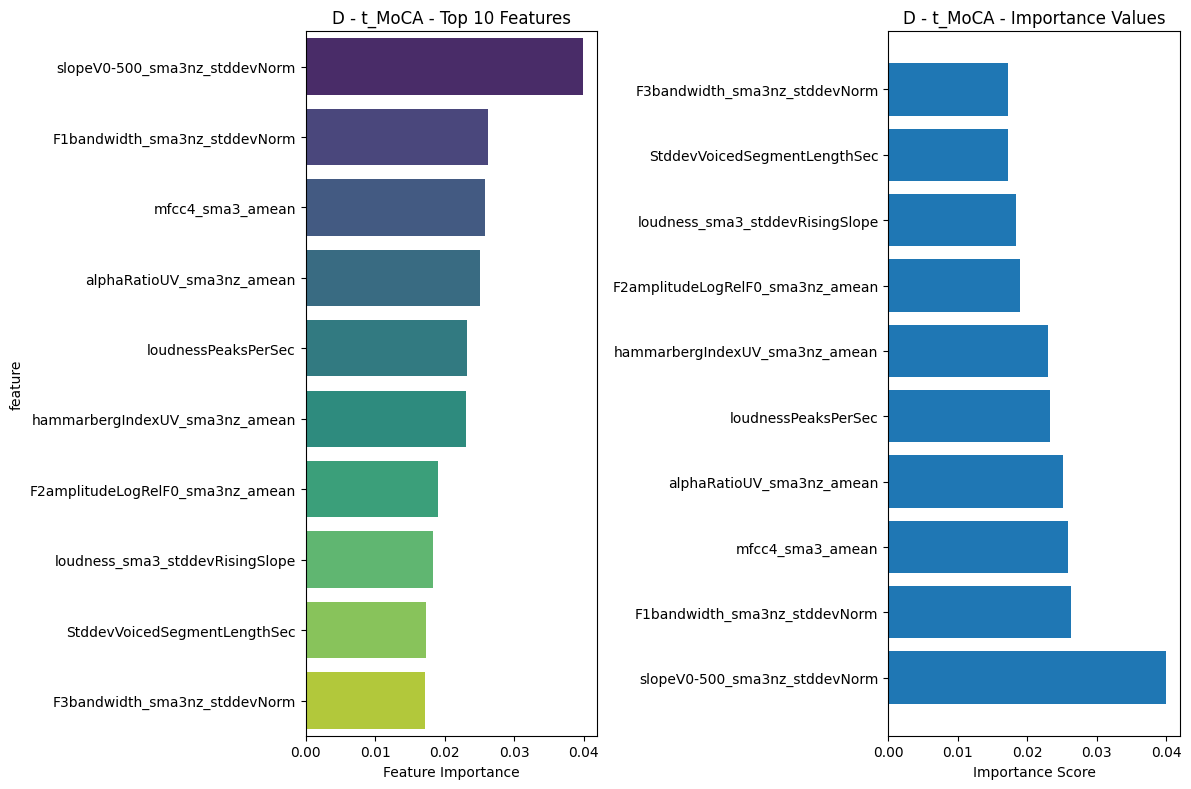

Топ-5 признаков:
                          feature  importance
63  slopeV0-500_sma3nz_stddevNorm    0.039983
43  F1bandwidth_sma3nz_stddevNorm    0.026247
28               mfcc4_sma3_amean    0.025815
76      alphaRatioUV_sma3nz_amean    0.025085
81            loudnessPeaksPerSec    0.023264

Стандартизированное чтение (R):


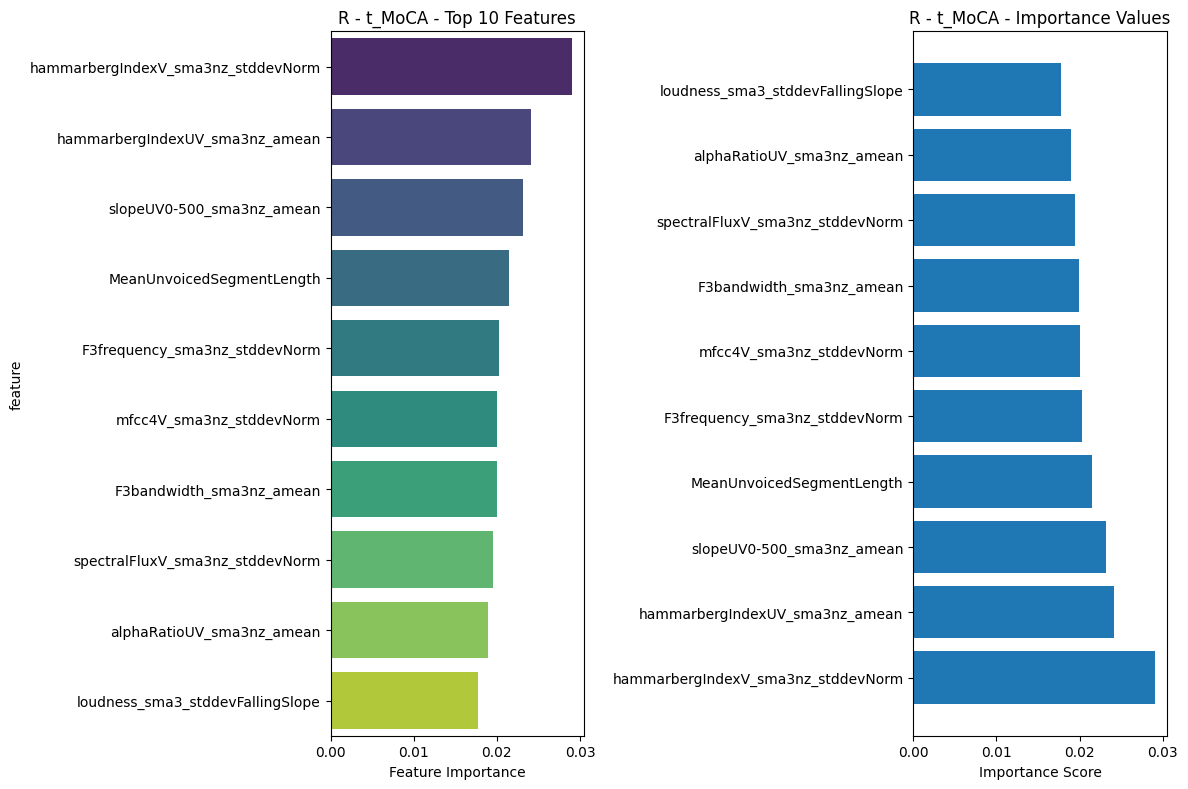

Топ-5 признаков:
                               feature  importance
61  hammarbergIndexV_sma3nz_stddevNorm    0.029039
77      hammarbergIndexUV_sma3nz_amean    0.024132
78           slopeUV0-500_sma3nz_amean    0.023127
85           MeanUnvoicedSegmentLength    0.021466
53       F3frequency_sma3nz_stddevNorm    0.020231

Общие признаки в топ-5: set()
Уникальные для D: {'loudnessPeaksPerSec', 'mfcc4_sma3_amean', 'F1bandwidth_sma3nz_stddevNorm', 'alphaRatioUV_sma3nz_amean', 'slopeV0-500_sma3nz_stddevNorm'}
Уникальные для R: {'F3frequency_sma3nz_stddevNorm', 'hammarbergIndexV_sma3nz_stddevNorm', 'MeanUnvoicedSegmentLength', 'slopeUV0-500_sma3nz_amean', 'hammarbergIndexUV_sma3nz_amean'}

--- Анализ для t_MMSE ---

Спонтанное описание (D):


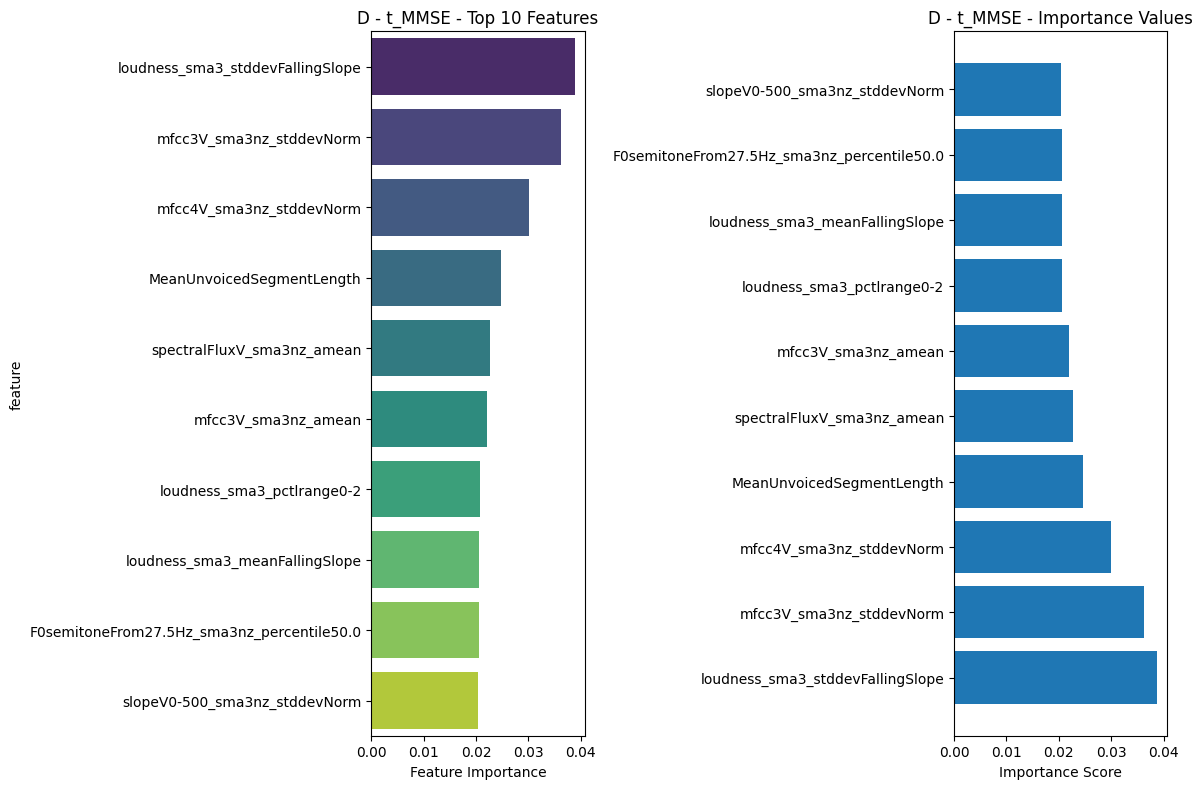

Топ-5 признаков:
                             feature  importance
19  loudness_sma3_stddevFallingSlope    0.038801
73          mfcc3V_sma3nz_stddevNorm    0.036299
75          mfcc4V_sma3nz_stddevNorm    0.030049
85         MeanUnvoicedSegmentLength    0.024664
66        spectralFluxV_sma3nz_amean    0.022699

Стандартизированное чтение (R):


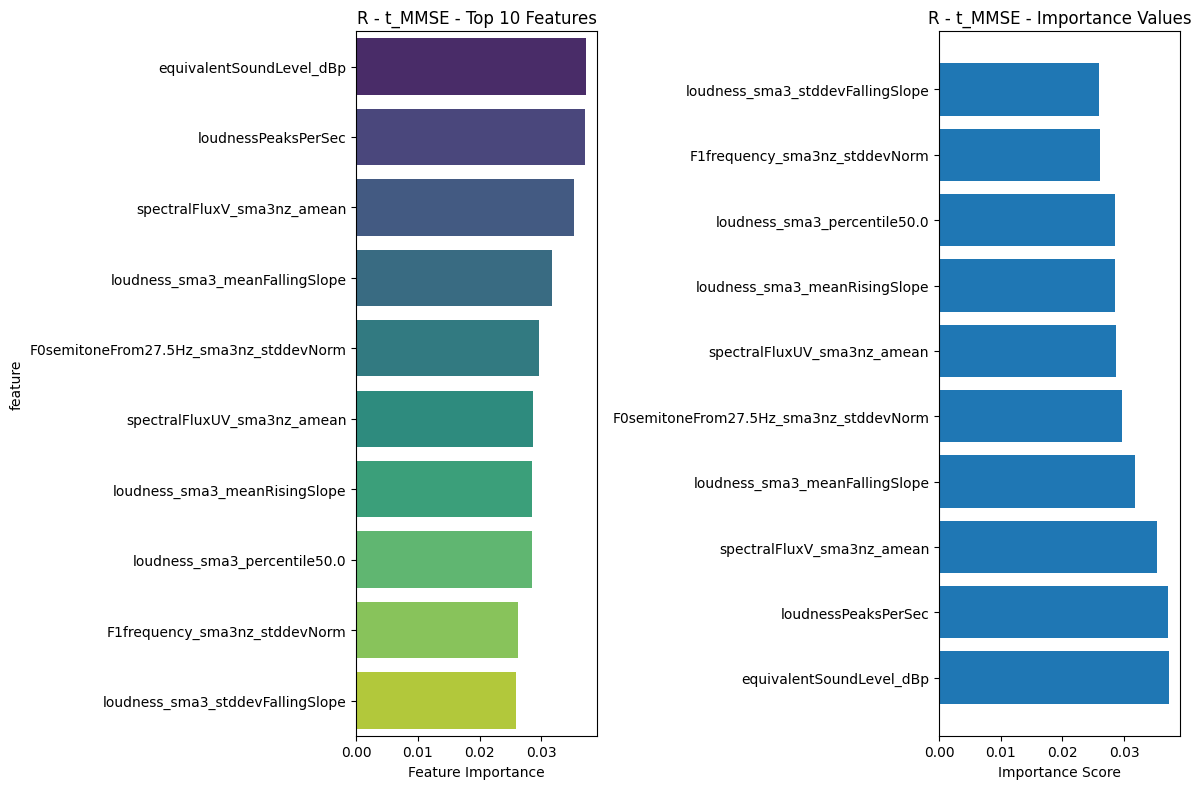

Топ-5 признаков:
                                   feature  importance
87                equivalentSoundLevel_dBp    0.037222
81                     loudnessPeaksPerSec    0.037067
66              spectralFluxV_sma3nz_amean    0.035331
18          loudness_sma3_meanFallingSlope    0.031774
1   F0semitoneFrom27.5Hz_sma3nz_stddevNorm    0.029665

Общие признаки в топ-5: {'spectralFluxV_sma3nz_amean'}
Уникальные для D: {'MeanUnvoicedSegmentLength', 'loudness_sma3_stddevFallingSlope', 'mfcc3V_sma3nz_stddevNorm', 'mfcc4V_sma3nz_stddevNorm'}
Уникальные для R: {'loudnessPeaksPerSec', 'equivalentSoundLevel_dBp', 'loudness_sma3_meanFallingSlope', 'F0semitoneFrom27.5Hz_sma3nz_stddevNorm'}

--- Анализ для t_CDR ---

Спонтанное описание (D):


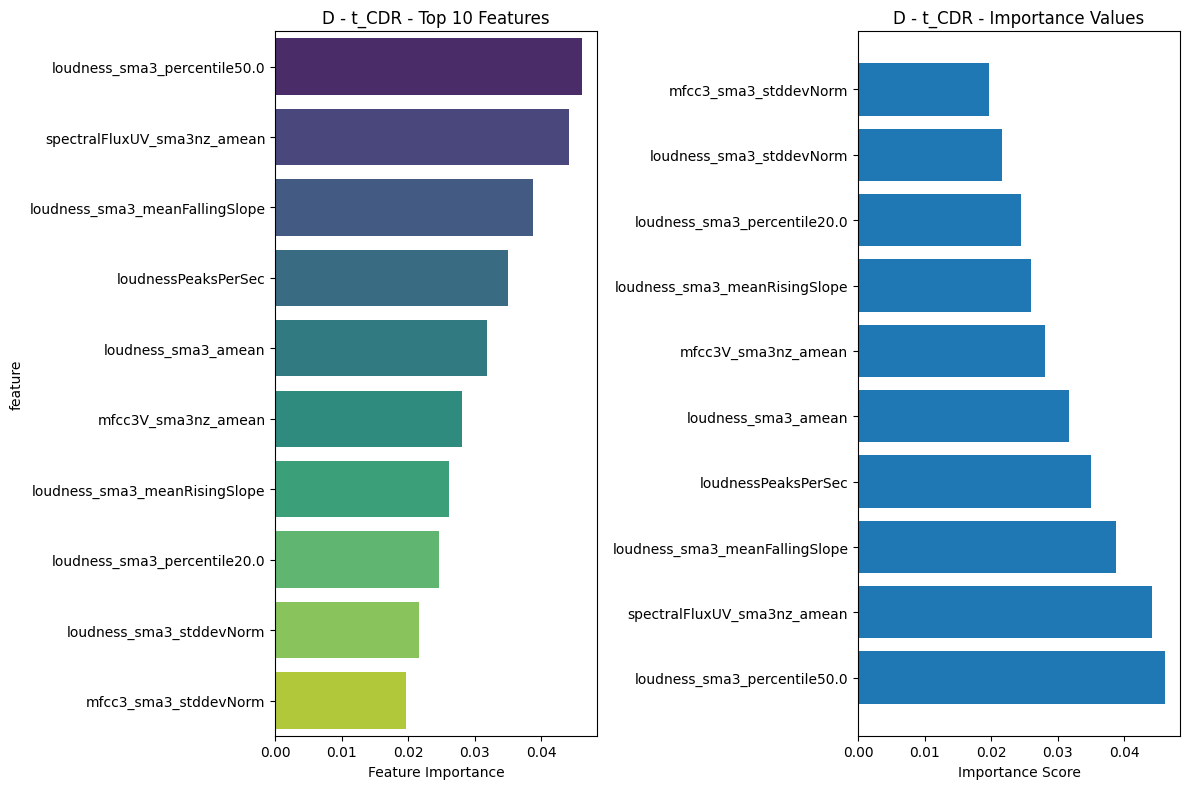

Топ-5 признаков:
                           feature  importance
13    loudness_sma3_percentile50.0    0.046090
80     spectralFluxUV_sma3nz_amean    0.044127
18  loudness_sma3_meanFallingSlope    0.038784
81             loudnessPeaksPerSec    0.035019
10             loudness_sma3_amean    0.031758

Стандартизированное чтение (R):


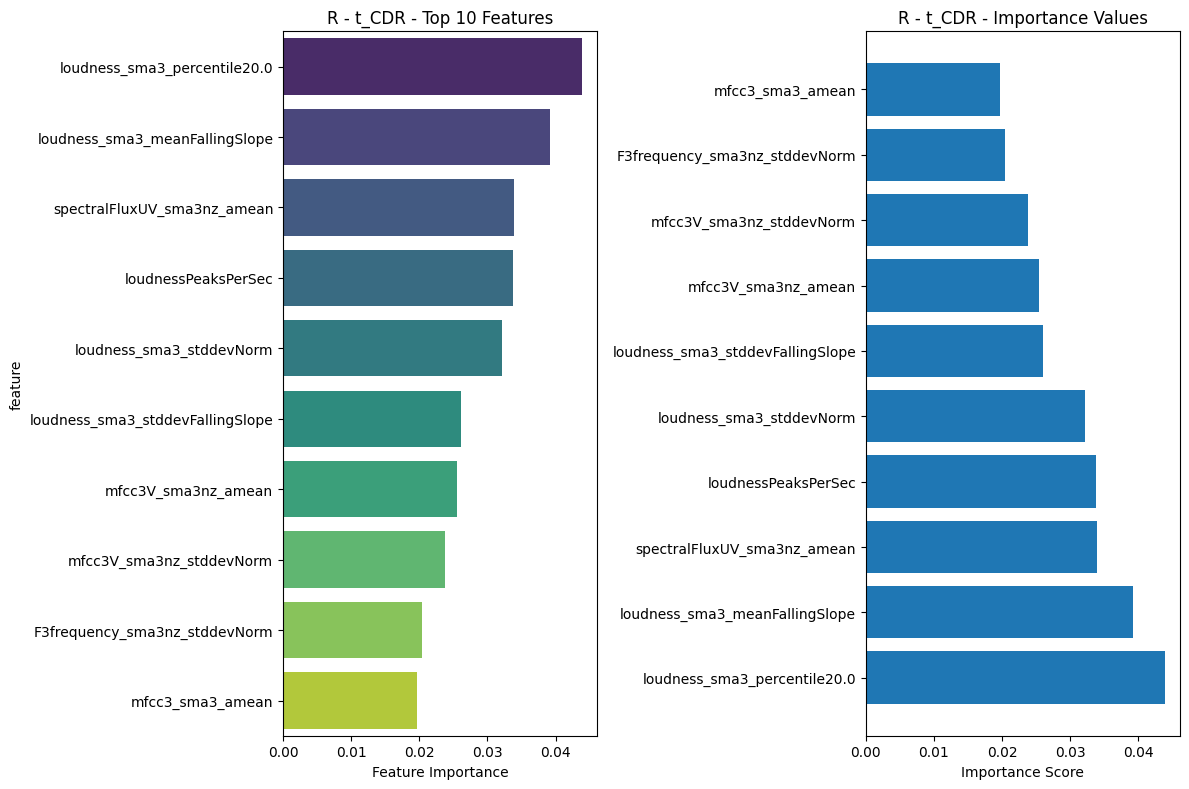

Топ-5 признаков:
                           feature  importance
12    loudness_sma3_percentile20.0    0.043926
18  loudness_sma3_meanFallingSlope    0.039156
80     spectralFluxUV_sma3nz_amean    0.033934
81             loudnessPeaksPerSec    0.033770
11        loudness_sma3_stddevNorm    0.032142

Общие признаки в топ-5: {'loudnessPeaksPerSec', 'loudness_sma3_meanFallingSlope', 'spectralFluxUV_sma3nz_amean'}
Уникальные для D: {'loudness_sma3_percentile50.0', 'loudness_sma3_amean'}
Уникальные для R: {'loudness_sma3_percentile20.0', 'loudness_sma3_stddevNorm'}


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Функция для анализа важности признаков
def analyze_feature_importance(df_modality, target_col, modality_name, top_n=15):
    """
    Анализ важности признаков для конкретной модальности
    """
    # Подготовка данных
    X, y = make_dataset(df_modality, target_col)
    
    # Удалим строки с пропусками
    mask = ~(X.isna().any(axis=1) | y.isna())
    X_clean = X[mask]
    y_clean = y[mask]
    
    # Обучим Random Forest для анализа важности признаков
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_clean, y_clean)
    
    # Важность признаков
    feature_importance = pd.DataFrame({
        'feature': X_clean.columns,
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=False)
    
    # Визуализация топ-N признаков
    plt.figure(figsize=(12, 8))
    top_features = feature_importance.head(top_n)
    
    plt.subplot(1, 2, 1)
    sns.barplot(data=top_features, y='feature', x='importance', palette='viridis')
    plt.title(f'{modality_name} - Top {top_n} Features')
    plt.xlabel('Feature Importance')
    plt.tight_layout()
    
    # Также покажем сырые значения
    plt.subplot(1, 2, 2)
    plt.barh(range(len(top_features)), top_features['importance'])
    plt.yticks(range(len(top_features)), top_features['feature'])
    plt.title(f'{modality_name} - Importance Values')
    plt.xlabel('Importance Score')
    plt.tight_layout()
    
    plt.show()
    
    return feature_importance

# Функция для расчета p-value с помощью перестановочного теста
def calculate_feature_pvalues(df_modality, target_col, n_permutations=1000):
    """
    Расчет p-value для признаков с помощью перестановочного теста
    """
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score
    import numpy as np
    
    X, y = make_dataset(df_modality, target_col)
    mask = ~(X.isna().any(axis=1) | y.isna())
    X_clean = X[mask]
    y_clean = y[mask]
    
    # Базовая модель
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_clean, y_clean)
    
    # Предсказания и базовая точность
    y_pred = rf.predict(X_clean)
    base_accuracy = accuracy_score(y_clean, y_pred)
    
    p_values = {}
    
    for feature in X_clean.columns:
        # Сохраняем оригинальные значения
        original_values = X_clean[feature].copy()
        permuted_accuracies = []
        
        # Перестановочный тест
        for _ in range(n_permutations):
            # Перемешиваем значения признака
            X_clean[feature] = np.random.permutation(X_clean[feature])
            rf_perm = RandomForestClassifier(n_estimators=50, random_state=42)
            rf_perm.fit(X_clean, y_clean)
            y_pred_perm = rf_perm.predict(X_clean)
            perm_accuracy = accuracy_score(y_clean, y_pred_perm)
            permuted_accuracies.append(perm_accuracy)
        
        # Восстанавливаем оригинальные значения
        X_clean[feature] = original_values
        
        # Расчет p-value
        p_value = np.mean(np.array(permuted_accuracies) >= base_accuracy)
        p_values[feature] = p_value
    
    return p_values

# Анализ для каждой модальности и каждого таргета
print("=== АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ ===")

targets = ['t_MoCA', 't_MMSE', 't_CDR']

for target in targets:
    print(f"\n--- Анализ для {target} ---")
    
    # Для спонтанного описания
    print(f"\nСпонтанное описание (D):")
    importance_D = analyze_feature_importance(df_D, target, f"D - {target}", top_n=10)
    print("Топ-5 признаков:")
    print(importance_D.head(5))
    
    # Для чтения
    print(f"\nСтандартизированное чтение (R):")
    importance_R = analyze_feature_importance(df_R, target, f"R - {target}", top_n=10)
    print("Топ-5 признаков:")
    print(importance_R.head(5))
    
    # Сравнение топ признаков
    top_D = set(importance_D.head(5)['feature'])
    top_R = set(importance_R.head(5)['feature'])
    common = top_D.intersection(top_R)
    
    print(f"\nОбщие признаки в топ-5: {common}")
    print(f"Уникальные для D: {top_D - common}")
    print(f"Уникальные для R: {top_R - common}")

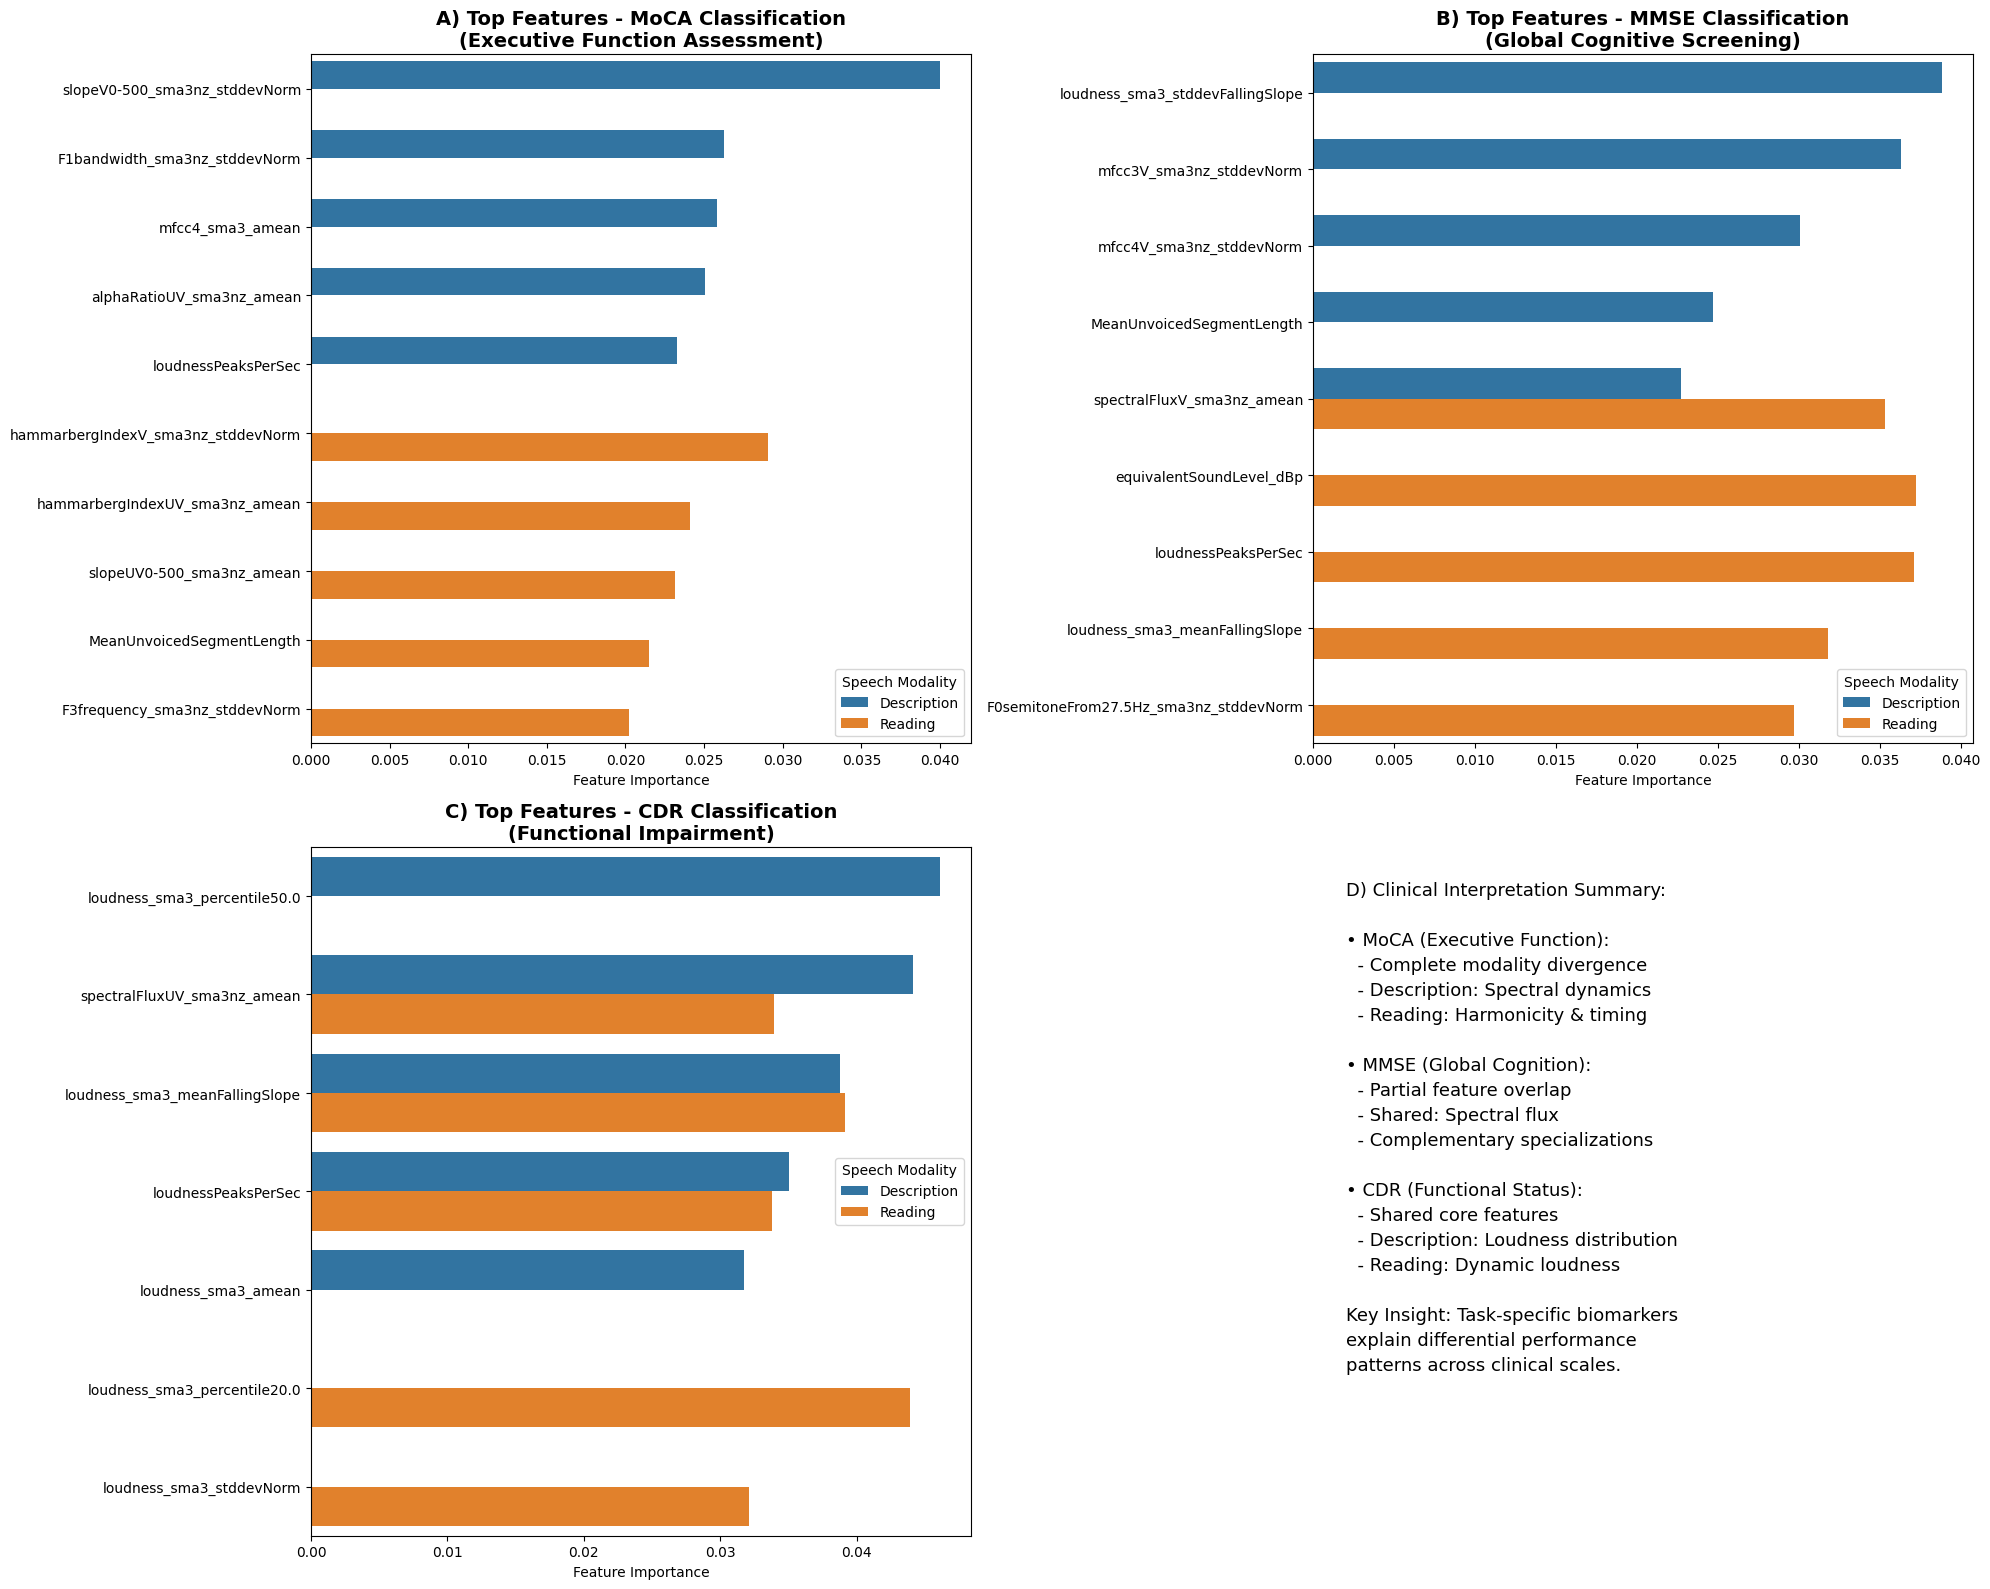

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def create_simple_combined_plot():
    """Создание объединенного графика без p-value"""
    
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    
    # 1. MoCA - самый важный таргет
    ax1 = axes[0, 0]
    
    # Данные для MoCA из ваших результатов
    mocca_D_features = ['slopeV0-500_sma3nz_stddevNorm', 'F1bandwidth_sma3nz_stddevNorm', 
                       'mfcc4_sma3_amean', 'alphaRatioUV_sma3nz_amean', 'loudnessPeaksPerSec']
    mocca_D_importance = [0.039983, 0.026247, 0.025815, 0.025085, 0.023264]
    
    mocca_R_features = ['hammarbergIndexV_sma3nz_stddevNorm', 'hammarbergIndexUV_sma3nz_amean',
                       'slopeUV0-500_sma3nz_amean', 'MeanUnvoicedSegmentLength', 'F3frequency_sma3nz_stddevNorm']
    mocca_R_importance = [0.029039, 0.024132, 0.023127, 0.021466, 0.020231]
    
    # Подготовка данных для MoCA
    plot_data_mocca = []
    for feature, imp in zip(mocca_D_features, mocca_D_importance):
        plot_data_mocca.append({'feature': feature, 'importance': imp, 'modality': 'Description'})
    for feature, imp in zip(mocca_R_features, mocca_R_importance):
        plot_data_mocca.append({'feature': feature, 'importance': imp, 'modality': 'Reading'})
    
    df_mocca = pd.DataFrame(plot_data_mocca)
    
    # График для MoCA
    sns.barplot(data=df_mocca, x='importance', y='feature', hue='modality', 
                ax=ax1, palette={'Description': '#1f77b4', 'Reading': '#ff7f0e'})
    ax1.set_title('A) Top Features - MoCA Classification\n(Executive Function Assessment)', 
                  fontsize=14, fontweight='bold')
    ax1.set_xlabel('Feature Importance')
    ax1.set_ylabel('')
    ax1.legend(title='Speech Modality')
    
    # 2. MMSE
    ax2 = axes[0, 1]
    
    mmse_D_features = ['loudness_sma3_stddevFallingSlope', 'mfcc3V_sma3nz_stddevNorm',
                      'mfcc4V_sma3nz_stddevNorm', 'MeanUnvoicedSegmentLength', 'spectralFluxV_sma3nz_amean']
    mmse_D_importance = [0.038801, 0.036299, 0.030049, 0.024664, 0.022699]
    
    mmse_R_features = ['equivalentSoundLevel_dBp', 'loudnessPeaksPerSec', 'spectralFluxV_sma3nz_amean',
                      'loudness_sma3_meanFallingSlope', 'F0semitoneFrom27.5Hz_sma3nz_stddevNorm']
    mmse_R_importance = [0.037222, 0.037067, 0.035331, 0.031774, 0.029665]
    
    plot_data_mmse = []
    for feature, imp in zip(mmse_D_features, mmse_D_importance):
        plot_data_mmse.append({'feature': feature, 'importance': imp, 'modality': 'Description'})
    for feature, imp in zip(mmse_R_features, mmse_R_importance):
        plot_data_mmse.append({'feature': feature, 'importance': imp, 'modality': 'Reading'})
    
    df_mmse = pd.DataFrame(plot_data_mmse)
    
    sns.barplot(data=df_mmse, x='importance', y='feature', hue='modality',
                ax=ax2, palette={'Description': '#1f77b4', 'Reading': '#ff7f0e'})
    ax2.set_title('B) Top Features - MMSE Classification\n(Global Cognitive Screening)', 
                  fontsize=14, fontweight='bold')
    ax2.set_xlabel('Feature Importance')
    ax2.set_ylabel('')
    ax2.legend(title='Speech Modality')
    
    # 3. CDR
    ax3 = axes[1, 0]
    
    cdr_D_features = ['loudness_sma3_percentile50.0', 'spectralFluxUV_sma3nz_amean',
                     'loudness_sma3_meanFallingSlope', 'loudnessPeaksPerSec', 'loudness_sma3_amean']
    cdr_D_importance = [0.046090, 0.044127, 0.038784, 0.035019, 0.031758]
    
    cdr_R_features = ['loudness_sma3_percentile20.0', 'loudness_sma3_meanFallingSlope',
                     'spectralFluxUV_sma3nz_amean', 'loudnessPeaksPerSec', 'loudness_sma3_stddevNorm']
    cdr_R_importance = [0.043926, 0.039156, 0.033934, 0.033770, 0.032142]
    
    plot_data_cdr = []
    for feature, imp in zip(cdr_D_features, cdr_D_importance):
        plot_data_cdr.append({'feature': feature, 'importance': imp, 'modality': 'Description'})
    for feature, imp in zip(cdr_R_features, cdr_R_importance):
        plot_data_cdr.append({'feature': feature, 'importance': imp, 'modality': 'Reading'})
    
    df_cdr = pd.DataFrame(plot_data_cdr)
    
    sns.barplot(data=df_cdr, x='importance', y='feature', hue='modality',
                ax=ax3, palette={'Description': '#1f77b4', 'Reading': '#ff7f0e'})
    ax3.set_title('C) Top Features - CDR Classification\n(Functional Impairment)', 
                  fontsize=14, fontweight='bold')
    ax3.set_xlabel('Feature Importance')
    ax3.set_ylabel('')
    ax3.legend(title='Speech Modality')
    
    # 4. Сводка интерпретаций
    ax4 = axes[1, 1]
    ax4.axis('off')
    
    summary_text = """D) Clinical Interpretation Summary:

• MoCA (Executive Function):
  - Complete modality divergence
  - Description: Spectral dynamics
  - Reading: Harmonicity & timing

• MMSE (Global Cognition):
  - Partial feature overlap  
  - Shared: Spectral flux
  - Complementary specializations

• CDR (Functional Status):
  - Shared core features
  - Description: Loudness distribution
  - Reading: Dynamic loudness

Key Insight: Task-specific biomarkers
explain differential performance
patterns across clinical scales."""

    ax4.text(0.05, 0.95, summary_text, transform=ax4.transAxes, fontsize=13, 
             verticalalignment='top', fontfamily='sans-serif', linespacing=1.5)
    
    plt.tight_layout()
    plt.savefig('feature_importance_combined.png', dpi=300, bbox_inches='tight')
    plt.show()

# Запускаем создание графика
create_simple_combined_plot()

In [13]:
%pip install catboost

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
mean_squared_error, r2_score, mean_absolute_error,
roc_auc_score, precision_score, recall_score, f1_score
)
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from catboost import CatBoostRegressor, CatBoostClassifier

In [11]:
def get_models(task: str, random_state=42):
    if task == 'reg':
        return {
            'CatBoost': Pipeline([
            ('imp', SimpleImputer(strategy='median')),
            ('cb', CatBoostRegressor(
            depth=6, n_estimators=500, learning_rate=0.05,
            loss_function='RMSE', verbose=0, random_state=random_state
            ))
            ]),
            'RandomForest': Pipeline([
            ('imp', SimpleImputer(strategy='median')),
            ('rf', RandomForestRegressor(
            n_estimators=300, random_state=random_state, n_jobs=-1
            ))
            ]),
            'DecisionTree': Pipeline([
            ('imp', SimpleImputer(strategy='median')),
            ('dt', DecisionTreeRegressor(random_state=random_state))
            ]),
            'LinearRegression': Pipeline([
            ('imp', SimpleImputer(strategy='median')),
            ('sc', StandardScaler()),
            ('lr', LinearRegression())
            ]),
            }
    elif task == 'clf':
        return {
            'CatBoost': Pipeline([
            ('imp', SimpleImputer(strategy='median')),
            ('cb', CatBoostClassifier(
            depth=6, n_estimators=500, learning_rate=0.05,
            loss_function='Logloss', eval_metric='AUC',
            verbose=0, random_state=random_state
            ))
            ]),
            'RandomForest': Pipeline([
            ('imp', SimpleImputer(strategy='median')),
            ('rf', RandomForestClassifier(
            n_estimators=300, random_state=random_state,
            class_weight='balanced', n_jobs=-1
            ))
            ]),
            'DecisionTree': Pipeline([
            ('imp', SimpleImputer(strategy='median')),
            ('dt', DecisionTreeClassifier(
            random_state=random_state, class_weight='balanced'
            ))
            ]),
            'LogisticRegression': Pipeline([
            ('imp', SimpleImputer(strategy='median')),
            ('sc', StandardScaler()),
            ('logreg', LogisticRegression(
            max_iter=1000, class_weight='balanced', n_jobs=-1
            ))
            ]),
            }
    else:
        raise ValueError('task должен быть "reg" или "clf"')

In [12]:
def evaluate_models(X, y, task='reg', test_size=0.2, random_state=42):
    stratify = y if task == 'clf' and len(pd.unique(y)) > 1 else None
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=random_state, stratify=stratify
    )
    models = get_models(task, random_state=random_state)
    rows = []
    for name, model in models.items():
        model.fit(X_train, y_train)

        if task == 'reg':
            y_pred = model.predict(X_test)
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            r2 = r2_score(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            rows.append({
                'Model': name,
                'RMSE': rmse,
                'R2': r2,
                'MAE': mae,
                'n_train': len(X_train),
                'n_test': len(X_test),
            })
        else:
            # Классификация
            if hasattr(model, 'predict_proba'):
                y_proba = model.predict_proba(X_test)[:, 1]
            elif hasattr(model, 'decision_function'):
                # приведем к [0,1]
                from sklearn.utils import column_or_1d
                scores = column_or_1d(model.decision_function(X_test))
                # min-max на случай AUC; если константа — добавим малый шум
                smin, smax = scores.min(), scores.max()
                y_proba = (scores - smin) / (smax - smin + 1e-12)
            else:
                # без вероятностей — используем предсказания как 0/1
                y_proba = model.predict(X_test)

            y_pred = (y_proba >= 0.5).astype(int)

            # Если в тесте одна из классов отсутствует — roc_auc не определен
            try:
                roc = roc_auc_score(y_test, y_proba)
            except ValueError:
                roc = np.nan

            prec = precision_score(y_test, y_pred, zero_division=0)
            rec = recall_score(y_test, y_pred, zero_division=0)
            f1 = f1_score(y_test, y_pred, zero_division=0)

            rows.append({
                'Model': name,
                'ROC_AUC': roc,
                'Precision': prec,
                'Recall': rec,
                'F1': f1,
                'n_train': len(X_train),
                'n_test': len(X_test),
                'Pos_test_share': float(np.mean(y_test == 1)),
            })

    res = pd.DataFrame(rows)
    # Сортировка по ключевой метрике
    if task == 'reg':
        res = res.sort_values(['RMSE', 'MAE', 'R2'], ascending=[True, True, False])
    else:
        res = res.sort_values(['ROC_AUC', 'F1', 'Recall', 'Precision'], ascending=False)
    return res.reset_index(drop=True)

In [13]:
reg_targets = ['MMSE', 'MoCA', 'CDR']
clf_targets = ['t_MMSE', 't_MoCA', 't_CDR']

In [14]:
def run_all(d, d_name):
    print(f'=== {d_name} ===')
    # Регрессия
    for t in reg_targets:
        try:
            X, y = make_dataset(d, t) # из предыдущего шага
        except KeyError:
            print(f'Нет таргета {t} в {d_name}')
            continue
        if len(y) < 5:
            print(f'{d_name} — {t}: слишком мало объектов ({len(y)})')
            continue
        res = evaluate_models(X, y, task='reg')
        print(f'{d_name} — регрессия: {t}, X={X.shape}, y={y.shape}')
        display(res)
    # Классификация
    for t in clf_targets:
        if t not in d.columns:
            print(f'Нет таргета {t} в {d_name}')
            continue
        X, y = make_dataset(d, t)
        # Проверим, что есть оба класса
        classes = np.unique(y.astype(int))
        if len(classes) < 2:
            print(f'{d_name} — {t}: один класс в данных {classes}')
            continue
        res = evaluate_models(X, y.astype(int), task='clf')
        print(f'{d_name} — классификация: {t}, X={X.shape}, y={y.shape}, классы={classes.tolist()}')
        display(res)

## DF (все вместе)

In [20]:
run_all(df, 'df')

=== df ===
df — регрессия: MMSE, X=(190, 88), y=(190,)


,Model,RMSE,R2,MAE,n_train,n_test
0,CatBoost,3.507988,0.111908,2.559310,152,38
1,RandomForest,3.508587,0.111605,2.512368,152,38
2,DecisionTree,4.055536,-0.186966,2.342105,152,38
3,LinearRegression,5.075677,-0.859215,3.511447,152,38


df — регрессия: MoCA, X=(180, 88), y=(180,)


,Model,RMSE,R2,MAE,n_train,n_test
0,CatBoost,3.957445,0.147036,3.226898,144,36
1,RandomForest,4.058369,0.102976,3.180926,144,36
2,LinearRegression,5.573535,-0.691853,4.577815,144,36
3,DecisionTree,6.114645,-1.036309,4.055556,144,36


df — регрессия: CDR, X=(190, 88), y=(190,)


,Model,RMSE,R2,MAE,n_train,n_test
0,CatBoost,0.367468,0.106588,0.251264,152,38
1,RandomForest,0.368924,0.099495,0.251974,152,38
2,DecisionTree,0.512989,-0.741123,0.368421,152,38
3,LinearRegression,3.915022,-100.410145,0.993530,152,38


df — классификация: t_MMSE, X=(190, 88), y=(190,), классы=[0, 1]


,Model,ROC_AUC,Precision,Recall,F1,n_train,n_test,Pos_test_share
0,RandomForest,0.903646,0.000000,0.000000,0.000000,152,38,0.157895
1,LogisticRegression,0.864583,0.444444,0.666667,0.533333,152,38,0.157895
2,CatBoost,0.828125,0.000000,0.000000,0.000000,152,38,0.157895
3,DecisionTree,0.468750,0.000000,0.000000,0.000000,152,38,0.157895


df — классификация: t_MoCA, X=(180, 88), y=(180,), классы=[0, 1]


,Model,ROC_AUC,Precision,Recall,F1,n_train,n_test,Pos_test_share
0,RandomForest,0.815385,0.735294,0.961538,0.833333,144,36,0.722222
1,CatBoost,0.792308,0.787879,1.000000,0.881356,144,36,0.722222
2,LogisticRegression,0.769231,0.869565,0.769231,0.816327,144,36,0.722222
3,DecisionTree,0.553846,0.750000,0.807692,0.777778,144,36,0.722222


df — классификация: t_CDR, X=(190, 88), y=(190,), классы=[0, 1]


,Model,ROC_AUC,Precision,Recall,F1,n_train,n_test,Pos_test_share
0,CatBoost,0.858238,1.0,0.222222,0.363636,152,38,0.236842
1,LogisticRegression,0.858238,0.6,0.666667,0.631579,152,38,0.236842
2,RandomForest,0.770115,1.0,0.222222,0.363636,152,38,0.236842
3,DecisionTree,0.632184,0.6,0.333333,0.428571,152,38,0.236842


In [21]:
run_all(df_R, 'df_R')

=== df_R ===
df_R — регрессия: MMSE, X=(95, 88), y=(95,)


,Model,RMSE,R2,MAE,n_train,n_test
0,RandomForest,3.600295,0.369363,2.227368,76,19
1,CatBoost,4.099856,0.182213,2.377634,76,19
2,DecisionTree,4.957716,-0.195822,3.315789,76,19
3,LinearRegression,10.403268,-4.265540,8.426105,76,19


df_R — регрессия: MoCA, X=(90, 88), y=(90,)


,Model,RMSE,R2,MAE,n_train,n_test
0,RandomForest,5.575074,0.080582,4.553333,72,18
1,CatBoost,6.141242,-0.115641,4.690710,72,18
2,DecisionTree,7.047458,-0.469187,6.111111,72,18
3,LinearRegression,7.921503,-0.856210,6.166048,72,18


df_R — регрессия: CDR, X=(95, 88), y=(95,)


,Model,RMSE,R2,MAE,n_train,n_test
0,RandomForest,0.442954,0.097694,0.313684,76,19
1,CatBoost,0.444344,0.092021,0.311309,76,19
2,DecisionTree,0.584898,-0.573248,0.368421,76,19
3,LinearRegression,0.733298,-1.472856,0.616940,76,19


df_R — классификация: t_MMSE, X=(95, 88), y=(95,), классы=[0, 1]


,Model,ROC_AUC,Precision,Recall,F1,n_train,n_test,Pos_test_share
0,CatBoost,0.625000,0.0,0.000000,0.00,76,19,0.157895
1,RandomForest,0.479167,0.0,0.000000,0.00,76,19,0.157895
2,LogisticRegression,0.437500,0.2,0.333333,0.25,76,19,0.157895
3,DecisionTree,0.375000,0.0,0.000000,0.00,76,19,0.157895


df_R — классификация: t_MoCA, X=(90, 88), y=(90,), классы=[0, 1]


,Model,ROC_AUC,Precision,Recall,F1,n_train,n_test,Pos_test_share
0,DecisionTree,0.561538,0.750000,0.923077,0.827586,72,18,0.722222
1,CatBoost,0.461538,0.705882,0.923077,0.800000,72,18,0.722222
2,LogisticRegression,0.384615,0.666667,0.615385,0.640000,72,18,0.722222
3,RandomForest,0.200000,0.722222,1.000000,0.838710,72,18,0.722222


df_R — классификация: t_CDR, X=(95, 88), y=(95,), классы=[0, 1]


,Model,ROC_AUC,Precision,Recall,F1,n_train,n_test,Pos_test_share
0,RandomForest,0.942857,1.000000,0.2,0.333333,76,19,0.263158
1,LogisticRegression,0.900000,0.666667,0.8,0.727273,76,19,0.263158
2,CatBoost,0.871429,1.000000,0.2,0.333333,76,19,0.263158
3,DecisionTree,0.621429,0.375000,0.6,0.461538,76,19,0.263158


In [22]:
run_all(df_D, 'df_D')

=== df_D ===
df_D — регрессия: MMSE, X=(95, 88), y=(95,)


,Model,RMSE,R2,MAE,n_train,n_test
0,CatBoost,3.589844,0.257312,2.721251,76,19
1,RandomForest,3.670673,0.223490,2.978070,76,19
2,DecisionTree,5.790191,-0.932152,4.263158,76,19
3,LinearRegression,9.372316,-4.062317,7.798177,76,19


df_D — регрессия: MoCA, X=(90, 88), y=(90,)


,Model,RMSE,R2,MAE,n_train,n_test
0,RandomForest,4.236982,0.165262,3.473704,72,18
1,CatBoost,4.372333,0.111079,3.530901,72,18
2,DecisionTree,5.374838,-0.343284,4.222222,72,18
3,LinearRegression,13.815855,-7.875491,9.838399,72,18


df_D — регрессия: CDR, X=(95, 88), y=(95,)


,Model,RMSE,R2,MAE,n_train,n_test
0,RandomForest,0.389795,0.268662,0.261404,76,19
1,CatBoost,0.423504,0.136702,0.292608,76,19
2,DecisionTree,0.500000,-0.203333,0.342105,76,19
3,LinearRegression,1.086848,-4.685693,0.929709,76,19


df_D — классификация: t_MMSE, X=(95, 88), y=(95,), классы=[0, 1]


,Model,ROC_AUC,Precision,Recall,F1,n_train,n_test,Pos_test_share
0,LogisticRegression,0.916667,0.666667,0.666667,0.666667,76,19,0.157895
1,RandomForest,0.760417,0.000000,0.000000,0.000000,76,19,0.157895
2,CatBoost,0.729167,0.000000,0.000000,0.000000,76,19,0.157895
3,DecisionTree,0.541667,0.200000,0.333333,0.250000,76,19,0.157895


df_D — классификация: t_MoCA, X=(90, 88), y=(90,), классы=[0, 1]


,Model,ROC_AUC,Precision,Recall,F1,n_train,n_test,Pos_test_share
0,DecisionTree,0.761538,0.857143,0.923077,0.888889,72,18,0.722222
1,CatBoost,0.723077,0.833333,0.769231,0.800000,72,18,0.722222
2,RandomForest,0.692308,0.687500,0.846154,0.758621,72,18,0.722222
3,LogisticRegression,0.476923,0.692308,0.692308,0.692308,72,18,0.722222


df_D — классификация: t_CDR, X=(95, 88), y=(95,), классы=[0, 1]


,Model,ROC_AUC,Precision,Recall,F1,n_train,n_test,Pos_test_share
0,CatBoost,0.742857,0.000000,0.0,0.000000,76,19,0.263158
1,RandomForest,0.714286,0.000000,0.0,0.000000,76,19,0.263158
2,DecisionTree,0.664286,0.666667,0.4,0.500000,76,19,0.263158
3,LogisticRegression,0.514286,0.285714,0.4,0.333333,76,19,0.263158


### Leave one out


In [15]:
from sklearn.model_selection import LeaveOneOut

def loo_cv_models(X, y, task='reg', random_state=42, verbose=True):
    loo = LeaveOneOut()
    models = get_models(task, random_state=random_state)
    rows = []
    for name, model in models.items():
        preds = []
        trues = []
        probas = []  # только для классификации
        for train_idx, test_idx in loo.split(X):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            preds.append(y_pred[0])
            trues.append(y_test.values[0])
            if task == 'clf':
                # вероятность "1" для roc_auc
                if hasattr(model, 'predict_proba'):
                    proba = model.predict_proba(X_test)[:, 1][0]
                elif hasattr(model, 'decision_function'):
                    z = model.decision_function(X_test)
                    # min-max по валидационной выборке
                    proba = (z - np.min(z)) / (np.ptp(z)+1e-9)
                    proba = proba[0]
                else:
                    proba = y_pred[0]
                probas.append(proba)

        preds = np.array(preds)
        trues = np.array(trues)
        
        if task == 'reg':
            rmse = mean_squared_error(trues, preds, squared=False)
            r2 = r2_score(trues, preds)
            mae = mean_absolute_error(trues, preds)
            row = {
                'Model': name, "RMSE": rmse, "R2": r2, "MAE": mae, "n_samples": len(trues)
            }
        else:
            preds_clipped = np.clip(np.round(preds).astype(int), 0, 1)
            trues_clipped = np.clip(trues.astype(int), 0, 1)
            if len(np.unique(trues_clipped)) < 2:
                roc = np.nan
            else:
                roc = roc_auc_score(trues_clipped, probas)
            prec = precision_score(trues_clipped, preds_clipped, zero_division=0)
            rec = recall_score(trues_clipped, preds_clipped, zero_division=0)
            f1 = f1_score(trues_clipped, preds_clipped, zero_division=0)
            row = {"Model": name, "ROC_AUC": roc, "Precision": prec, "Recall": rec, "F1": f1, "n_samples": len(trues)}
        rows.append(row)
    return pd.DataFrame(rows)

In [16]:
def run_loo_all(d, d_name):
    print(f'=== {d_name} LOO ===')
    # Регрессия
    for t in reg_targets:
        try:
            X, y = make_dataset(d, t)
        except KeyError:
            print(f'Нет таргета {t} в {d_name}')
            continue
        if len(y) < 5:
            print(f'{t}: мало объектов ({len(y)})')
            continue
        print(f'LOO {d_name} — регрессия: {t} ({len(y)} объектов)')
        res = loo_cv_models(X, y, task='reg')
        display(res)
    # Классификация
    for t in clf_targets:
        if t not in d.columns:
            continue
        X, y = make_dataset(d, t)
        # только если два класса!
        classes = np.unique(y.astype(int))
        if len(classes) < 2:
            print(f'{t}: только один класс')
            continue
        print(f'LOO {d_name} — классификация: {t} ({len(y)} объектов, классы {classes.tolist()})')
        res = loo_cv_models(X, y.astype(int), task='clf')
        display(res)

In [ ]:
run_loo_all(df, 'df')

In [ ]:
run_loo_all(df_R, 'df_R')

=== df_R LOO ===
LOO df_R — регрессия: MMSE (95 объектов)


,Model,RMSE,R2,MAE,n_samples
0,CatBoost,3.355971,0.147021,2.345765,95
1,RandomForest,3.398937,0.125040,2.493439,95
2,DecisionTree,4.702743,-0.674961,3.652632,95
3,LinearRegression,15.979033,-18.337625,10.568679,95


LOO df_R — регрессия: MoCA (90 объектов)


,Model,RMSE,R2,MAE,n_samples
0,CatBoost,4.933655,-0.036471,3.775540,90
1,RandomForest,4.984311,-0.057864,3.956444,90
2,DecisionTree,5.665686,-0.366862,4.277778,90
3,LinearRegression,1666.082903,-118197.761176,422.856922,90


LOO df_R — регрессия: CDR (95 объектов)


,Model,RMSE,R2,MAE,n_samples
0,CatBoost,0.424546,0.038334,0.312186,95
1,RandomForest,0.424009,0.040765,0.318404,95
2,DecisionTree,0.619847,-1.049956,0.452632,95
3,LinearRegression,4.877084,-125.909960,1.936826,95


LOO df_R — классификация: t_MMSE (95 объектов, классы [0, 1])


,Model,ROC_AUC,Precision,Recall,F1,n_samples
0,CatBoost,0.664557,0.600000,0.1875,0.285714,95
1,RandomForest,0.706092,0.000000,0.0000,0.000000,95
2,DecisionTree,0.517801,0.200000,0.1875,0.193548,95
3,LogisticRegression,0.792722,0.421053,0.5000,0.457143,95


LOO df_R — классификация: t_MoCA (90 объектов, классы [0, 1])


,Model,ROC_AUC,Precision,Recall,F1,n_samples
0,CatBoost,0.392000,0.725000,0.892308,0.800000,90
1,RandomForest,0.380923,0.722222,1.000000,0.838710,90
2,DecisionTree,0.415385,0.672131,0.630769,0.650794,90
3,LogisticRegression,0.468308,0.683333,0.630769,0.656000,90


LOO df_R — классификация: t_CDR (95 объектов, классы [0, 1])


,Model,ROC_AUC,Precision,Recall,F1,n_samples
0,CatBoost,0.639493,0.222222,0.086957,0.125000,95
1,RandomForest,0.705918,0.500000,0.086957,0.148148,95
2,DecisionTree,0.605374,0.409091,0.391304,0.400000,95
3,LogisticRegression,0.768116,0.461538,0.521739,0.489796,95


In [ ]:
run_loo_all(df_D, 'df_D')

=== df_D LOO ===
LOO df_D — регрессия: MMSE (95 объектов)


,Model,RMSE,R2,MAE,n_samples
0,CatBoost,3.503864,0.070185,2.543008,95
1,RandomForest,3.622642,0.006077,2.661930,95
2,DecisionTree,4.494441,-0.529866,3.147368,95
3,LinearRegression,22.044508,-35.804673,13.731206,95


LOO df_D — регрессия: MoCA (90 объектов)


,Model,RMSE,R2,MAE,n_samples
0,CatBoost,4.575788,0.108438,3.568685,90
1,RandomForest,4.502214,0.136878,3.595148,90
2,DecisionTree,6.173420,-0.622824,4.911111,90
3,LinearRegression,3881.464410,-641520.071552,565.008325,90


LOO df_D — регрессия: CDR (95 объектов)


,Model,RMSE,R2,MAE,n_samples
0,CatBoost,0.404750,0.125923,0.278260,95
1,RandomForest,0.399011,0.150538,0.283982,95
2,DecisionTree,0.561951,-0.684895,0.421053,95
3,LinearRegression,2.210227,-25.064467,1.540624,95


LOO df_D — классификация: t_MMSE (95 объектов, классы [0, 1])


,Model,ROC_AUC,Precision,Recall,F1,n_samples
0,CatBoost,0.638449,0.250000,0.0625,0.100000,95
1,RandomForest,0.547073,0.000000,0.0000,0.000000,95
2,DecisionTree,0.354430,0.000000,0.0000,0.000000,95
3,LogisticRegression,0.769778,0.352941,0.3750,0.363636,95


LOO df_D — классификация: t_MoCA (90 объектов, классы [0, 1])


,Model,ROC_AUC,Precision,Recall,F1,n_samples
0,CatBoost,0.624000,0.734177,0.892308,0.805556,90
1,RandomForest,0.595077,0.735632,0.984615,0.842105,90
2,DecisionTree,0.453846,0.696970,0.707692,0.702290,90
3,LogisticRegression,0.529846,0.711864,0.646154,0.677419,90


LOO df_D — классификация: t_CDR (95 объектов, классы [0, 1])


,Model,ROC_AUC,Precision,Recall,F1,n_samples
0,CatBoost,0.693237,0.642857,0.391304,0.486486,95
1,RandomForest,0.740640,0.666667,0.260870,0.375000,95
2,DecisionTree,0.714976,0.483871,0.652174,0.555556,95
3,LogisticRegression,0.664855,0.388889,0.608696,0.474576,95
